# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

In [2]:
import pandas as pd
import re
from matplotlib import pyplot
import csodiaq_base_functions as cbf
import csodiaq_figure_functions as cff
import csodiaq_menu_functions as menu
import os
import numpy as np
from matplotlib.font_manager import FontProperties
pd.set_option('display.max_rows', None)

## Loading Results

In [2]:
files = list(os.listdir('Data/Output'))
removables = ['unfilteredPpmPerRow', 'filteredBestMatch', 'offset_tolerance', 'ppmSpread', 'ppmSpreadDecoy', '.DS_Store']
csodiaq = []
check = True
for f in files:
    for r in removables:
        if r in f:
            check = False
    if check:
        csodiaq.append('Data/Output/'+f)
    check = True

csodiaq = sorted(csodiaq)
for x in csodiaq: print(x)

Data/Output/csodiaq_lib-faims-mgf-5peaks_exp-n1b.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_corrected.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_corrected_peptideFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_corrected_proteinFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_corrected_spectralFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_peptideFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_proteinFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-MCF7_spectralFDR.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-n1b.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-n1b_corrected.csv
Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-10peaks_exp-n1b_corrected_peptideFDR.c

In [135]:
#for x in csodiaq: print(x); cff.write_meta_analysis_files(x)
listOfFiles = list(os.listdir('Data/Figures/FDRGraphs/'))
listOfFiles = sorted(['Data/Figures/FDRGraphs/'+x for x in listOfFiles])
print(len(listOfFiles))

#listOfFiles = listOfFiles[:16]
#listOfFiles = listOfFiles[16:34]
#listOfFiles = listOfFiles[34:52]
#listOfFiles = listOfFiles[52:70]
#listOfFiles = listOfFiles[70:]

listOfFiles = [x for x in listOfFiles if ('6peaks' in x and 'n1b' in x)]
#listOfFiles = [x for x in listOfFiles if '6peaks' in x]
#listOfFiles = [x for x in listOfFiles if '10peaks' in x]
#listOfFiles = [x for x in listOfFiles if '20peaks' in x]
#listOfFiles = [x for x in listOfFiles if '31peaks' in x]


listOfFiles

61


['Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-6peaks_exp-n1b_corrected_FDRGraph_spectral.csv']

In [136]:
def make_graph_df(listOfFiles):
    concatLists = []
    for file in listOfFiles:
        temp = pd.read_csv(file)
        groupName = re.sub('Data/Figures/FDRGraphs/(.*)\.csv', r'\1', file)
        if 'corrected' in groupName: groupName = 'corrected'
        else: groupName = 'uncorrected'
        temp['group'] = [groupName for x in range(len(temp))]
        concatLists.append(temp)
    return pd.concat(concatLists)

In [137]:
spectrum = make_graph_df([x for x in listOfFiles if 'spectral' in x])
spectrum

,matches,FDRCutoff,cosine,FDRDecoys,group
0,3,0,0.000000,0,uncorrected
1,4,0,0.000000,0,uncorrected
2,5,16027,0.943812,160,uncorrected
3,6,8590,0.374060,37,uncorrected
4,7,11,0.865254,0,uncorrected
5,8,1,0.969854,0,uncorrected
0,3,0,0.000000,0,corrected
1,4,18497,0.978369,184,corrected
2,5,15693,0.374060,138,corrected
3,6,7294,0.374060,6,corrected


In [138]:
peptide = make_graph_df([x for x in listOfFiles if 'peptide' in x])
peptide

,matches,FDRCutoff,cosine,FDRDecoys,group
0,3,0,0.000000,0,uncorrected
1,4,0,0.000000,0,uncorrected
2,5,3972,0.976367,39,uncorrected
3,6,2722,0.803086,27,uncorrected
4,7,11,0.865254,0,uncorrected
5,8,1,0.969854,0,uncorrected
0,3,0,0.000000,0,corrected
1,4,3446,0.993581,34,corrected
2,5,4276,0.921355,42,corrected
3,6,2279,0.678215,6,corrected


In [139]:
protein = make_graph_df([x for x in listOfFiles if 'protein' in x])
protein

,matches,FDRCutoff,cosine,FDRDecoys,group
0,3,0,0.000000,0,uncorrected
1,4,0,0.000000,0,uncorrected
2,5,586,0.994029,5,uncorrected
3,6,455,0.976424,0,uncorrected
4,7,0,0.000000,0,uncorrected
5,8,0,0.000000,0,uncorrected
0,3,0,0.000000,0,corrected
1,4,683,0.997310,3,corrected
2,5,790,0.976192,7,corrected
3,6,452,0.924918,2,corrected


In [3]:
fontP = FontProperties()
fontP.set_size('medium')

## Optimal FDR Cutoff

### Spectral Level Analysis

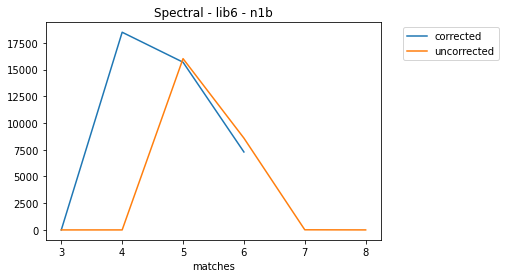

In [141]:
spectrumFDR = spectrum.pivot(index='matches', columns='group', values='FDRCutoff')
spectrumFDR.plot()
pyplot.title('Spectral - lib6 - n1b')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

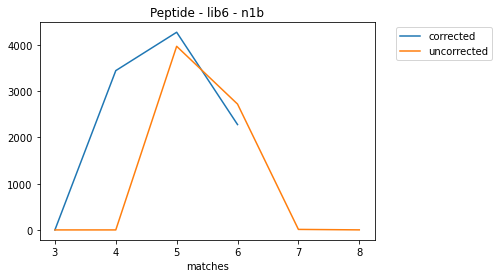

In [142]:
peptideFDR = peptide.pivot(index='matches', columns='group', values='FDRCutoff')
peptideFDR.plot()
pyplot.title('Peptide - lib6 - n1b')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

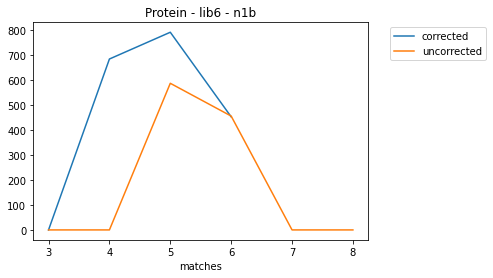

In [143]:
proteinFDR = protein.pivot(index='matches', columns='group', values='FDRCutoff')
proteinFDR.plot()
pyplot.title('Protein - lib6 - n1b')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## More Graphs

In [4]:
def fdr_calculation(df, fdrList=False):
    # initializing the two return values at 0
    fdrValues = []
    numDecoys = 0
    df.fillna("nan",inplace=True)
    # for every row in the dataframe
    for i in range(len(df)):
        # current criteria for 'decoys' is to have 'decoy' in the protein name. This may change in the future.
        if 'DECOY' in df.loc[i]['Name']:
            numDecoys += 1
        # calculates the FDR up to this point in the data frame.
        curFDR = numDecoys/(i+1)

        # conditional statement comparing the current FDR to the FDR Cutoff. If larger, function values are returned.
        if curFDR > 0.01:

            # if the number of rows has not yet reached the minimum number that allows for the FDR cutoff, 0 is returned instead.
            if len(fdrValues) < 1/0.01:
                if fdrList: return [], 0
                else: return 0, 0
            if fdrList: return fdrValues, numDecoys-1
            else: return len(fdrValues), numDecoys-1
        fdrValues.append(curFDR)
    if fdrList: return fdrValues, numDecoys-1
    else: return len(fdrValues), numDecoys-1

In [40]:
files = list(os.listdir('Data/Figures/FDRGraphs'))
files = ['Data/Figures/FDRGraphs/' + x for x in files]
peptides = [x for x in files if 'peptide' in x]
proteins = [x for x in files if 'protein' in x]
data = []
for x in peptides:
    tempDf = pd.read_csv(x)
    m = tempDf.idxmax()['FDRCutoff']
    run = int(re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_peptide\.csv', r'\2', x))
    correct = bool(re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_peptide\.csv', r'\3', x))
    peaks = int(re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_peptide\.csv', r'\1', x))
    if correct: c = data.append([run, tempDf.loc[m]['FDRCutoff'], tempDf.loc[m]['cosine'], 'csoDIAq, corrected '+str(peaks)])
    else: c = data.append([run, tempDf.loc[m]['FDRCutoff'], tempDf.loc[m]['cosine'], 'csoDIAq, uncorrected '+str(peaks)])

    
    
head = 'Data/Input/100reps_searchoutput/'
files = [head+x for x in list(os.listdir(head))]
for x in files:
    tempDf = pd.read_csv(x, sep='\t').sort_values('cosine', ascending=False).reset_index(drop=True)
    tempDf = tempDf.drop_duplicates(subset='Peptide', keep='first').reset_index(drop=True)
    run = int(re.sub('Data/Input/100reps_searchoutput/2da10ppm20200719_MAGIC_MCF7_1128repro_(\d{2,3})\.txt', r'\1', x))
    hits, decoys = fdr_calculation(tempDf)
    data.append([run, hits, tempDf.loc[hits-1]['cosine'], 'MSPLIT'])
    

files = ['Data/Output/' + x for x in list(os.listdir('Data/Output/')) if 'filteredBestMatch' in x]
for x in files:
    bestMatch = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_filteredBestMatch(\d+)\.csv', r'\4', x))
    newFile = re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_filteredBestMatch\d+\.csv', r'Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-\1peaks_exp-100reps-rep\2\3.csv', x)
    tempDf = pd.read_csv(newFile)
    tempDf = tempDf[tempDf['shared'] >= bestMatch]
    tempDf = tempDf.sort_values('cosine', ascending=False).drop_duplicates(subset='peptide', keep='first').reset_index(drop=True)
    run = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_filteredBestMatch\d+\.csv', r'\2', x))
    correct = bool(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_filteredBestMatch\d+\.csv', r'\3', x))
    peaks = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_filteredBestMatch\d+\.csv', r'\1', x))

    
    if correct: data.append([run, len(tempDf), 0, 'csoDIAq, corrected, noFDR Filter '+str(peaks)])
    else: data.append([run, len(tempDf), 0, 'csoDIAq, uncorrected, noFDR Filter '+str(peaks)])
 
'''
    tempDf2 = tempDf[tempDf['cosine'] > 0.7].reset_index(drop=True)
    cutoff, decoys = cbf.fdr_calculation(tempDf2)
    
    if correct: data.append([run, cutoff, tempDf2.loc[len(tempDf2)-1]['cosine'], 'csoDIAq, corrected, Cosine 0.7 Filter '+str(peaks)])
    else: data.append([run, cutoff, tempDf2.loc[len(tempDf2)-1]['cosine'], 'csoDIAq, uncorrected, Cosine 0.7 Filter '+str(peaks)])
    
    tempDf3 = tempDf[tempDf['shared'] > 3].reset_index(drop=True)
    cutoff, decoys = cbf.fdr_calculation(tempDf3)
    
    if correct: data.append([run, cutoff, tempDf3.loc[len(tempDf3)-1]['cosine'], 'csoDIAq, corrected, 4+ matching peaks '+str(peaks)])
    else: data.append([run, cutoff, tempDf3.loc[len(tempDf3)-1]['cosine'], 'csoDIAq, uncorrected, 4+ matching peaks '+str(peaks)])
'''
    
peptideDf = pd.DataFrame(data, columns = ['run','num of hits', 'cosine', 'type'])
peptideDf = peptideDf.sort_values(['run', 'type']).reset_index(drop=True)
peptideDf.to_csv('Data/Output/MSPLIT_csoDIAq_100repCompare_peptide_lib31_raw.csv')
peptideDf

,run,num of hits,cosine,type
0,1,1512.0,0.705036,MSPLIT
1,1,2661.0,0.932134,"csoDIAq, corrected 31"
2,1,1362.0,0.605099,"csoDIAq, corrected 6"
3,1,3573.0,0.000000,"csoDIAq, corrected, noFDR Filter 31"
4,1,1733.0,0.948253,"csoDIAq, uncorrected 31"
5,1,1651.0,0.481259,"csoDIAq, uncorrected 6"
6,1,2994.0,0.000000,"csoDIAq, uncorrected, noFDR Filter 31"
7,2,1525.0,0.705010,MSPLIT
8,2,2739.0,0.939620,"csoDIAq, corrected 31"
9,2,1426.0,0.678897,"csoDIAq, corrected 6"


In [53]:
isin = [
    'MSPLIT',
    'csoDIAq, corrected 6',
 #   'csoDIAq, corrected, 4+ matching peaks 6',
 #   'csoDIAq, corrected, Cosine 0.7 Filter 6',
 #   'csoDIAq, corrected, noFDR Filter 6',
 #   'csoDIAq, uncorrected 6',
    'csoDIAq, corrected 31',
 #   'csoDIAq, corrected, 4+ matching peaks 31',
 #   'csoDIAq, corrected, Cosine 0.7 Filter 31',
  #  'csoDIAq, corrected, noFDR Filter 31',
 #   'csoDIAq, uncorrected, 4+ matching peaks 6',
 #   'csoDIAq, uncorrected, Cosine 0.7 Filter 6',
 #   'csoDIAq, uncorrected, noFDR Filter 6'
    'csoDIAq, uncorrected 6',
 #   'csoDIAq, uncorrected, 4+ matching peaks 31',
 #   'csoDIAq, uncorrected, Cosine 0.7 Filter 31',
 #   'csoDIAq, uncorrected, noFDR Filter 31',
    'csoDIAq, uncorrected 31',
]
peptideDf.to_csv('Data/MSPLIT_csoDIAq_100repCompare_peptide_lib31_raw.csv')


(0.0, 4000.0)

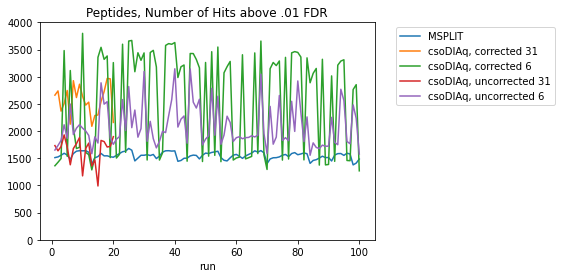

In [55]:
tempDf = peptideDf[peptideDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='num of hits')
graph.plot()
pyplot.title('Peptides, Number of Hits above .01 FDR')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,4000)

(0.0, 1.0)

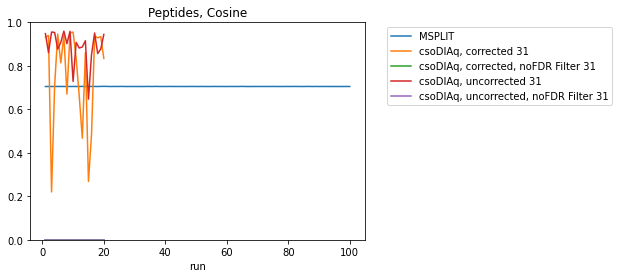

In [36]:
tempDf = peptideDf[peptideDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='cosine')
graph.plot()
pyplot.title('Peptides, Cosine')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,1)

(0.0, 1.0)

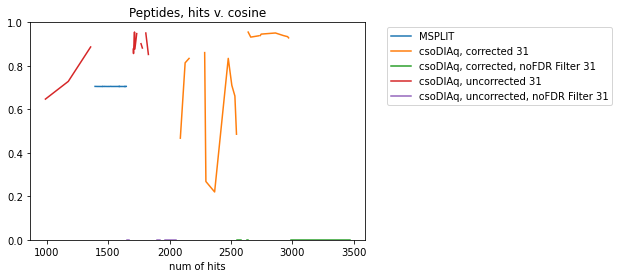

In [37]:
tempDf = peptideDf[peptideDf.type.isin(isin)]
tempDf = tempDf.drop_duplicates(subset='num of hits', keep='first').reset_index(drop=True)
graph = tempDf.pivot(index='num of hits', columns='type', values='cosine')
graph.plot()
pyplot.title('Peptides, hits v. cosine')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,1)

In [39]:
data = []
for x in proteins:
    tempDf = pd.read_csv(x)
    m = max(list(tempDf['FDRCutoff']))
    run = re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_protein\.csv', r'\2', x)
    correct = bool(re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_protein\.csv', r'\3', x))
    peaks = re.sub('Data/Figures/FDRGraphs/csodiaq_lib-human-noloss-400to2000-pt2mz-(\d+)peaks_exp-100reps-rep(\d{2,3})(_corrected)?_FDRGraph_protein\.csv', r'\1', x)
    if correct: c = 'corrected'
    else: c = 'uncorrected'
    data.append([run, m, c])
protienDf = pd.DataFrame(data, columns = ['run','num of hits', 'type'])
graph = protienDf.pivot(index='run', columns='type', values='num of hits')

graph.plot()
pyplot.title('Proteins')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
pyplot.ylim(0,1100)

ValueError: Index contains duplicate entries, cannot reshape

In [73]:
data = []

head = 'Data/Input/100reps_searchoutput/'
files = [head+x for x in list(os.listdir(head))]
for x in files:
    tempDf = pd.read_csv(x, sep='\t').sort_values('cosine', ascending=False).reset_index(drop=True)
    tempDf = tempDf.drop_duplicates(subset='Peptide', keep='first').reset_index(drop=True)
    run = int(re.sub('Data/Input/100reps_searchoutput/2da10ppm20200719_MAGIC_MCF7_1128repro_(\d{2,3})\.txt', r'\1', x))
    hits, decoys = fdr_calculation(tempDf)
    data.append([run, hits, tempDf.loc[hits-1]['cosine'], 'MSPLIT'])
    
head = 'Data/Output/'
files = [head+x for x in list(os.listdir(head)) if 'extraScores' in x]



for x in sorted(files):
    df = pd.read_csv(x)
    run = int(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?_extraScores.csv', r'\1', x))
    correct = bool(re.sub('Data/Output/csodiaq_lib-human-noloss-400to2000-pt2mz-31peaks_exp-100reps-rep(\d{2,3})(_corrected)?_extraScores.csv', r'\2', x))
    scores = [y for y in list(df.columns) if re.search('match\d+rootXcosine',y)]
    print(run)
    for score in scores:
        tempDf = df.sort_values(score, ascending=False).reset_index(drop=True)
        tempDf = tempDf.drop_duplicates(subset='peptide', keep='first').reset_index(drop=True)
        hits, decoys = cbf.fdr_calculation(tempDf)
        if correct: data.append([run, hits, tempDf.loc[hits-1]['cosine'], score + ', corrected'])
        else: data.append([run, hits, tempDf.loc[hits-1]['cosine'], score + ', uncorrected'])

scoreDf = pd.DataFrame(data, columns = ['run','num of hits', 'cosine', 'type'])
scoreDf = scoreDf.sort_values(['run', 'type']).reset_index(drop=True)
scoreDf



1
True
1
False
2
True
2
False
3
True
3
False
4
True
4
False
5
True
5
False
6
True
6
False
7
True
7
False
8
True
8
False
9
True
9
False
10
True
10
False
11
True
11
False
12
True
12
False
13
True
13
False
14
True
14
False
15
True
15
False
16
True
16
False
17
True
17
False
18
True
18
False
19
True
19
False
20
True
20
False


,run,num of hits,cosine,type
0,1,1512,0.705036,MSPLIT
1,1,2728,0.982809,"match10rootXcosine, corrected"
2,1,1648,0.971839,"match10rootXcosine, uncorrected"
3,1,2666,0.982809,"match11rootXcosine, corrected"
4,1,1656,0.960563,"match11rootXcosine, uncorrected"
5,1,2682,0.826069,"match1rootXcosine, corrected"
6,1,1314,0.942169,"match1rootXcosine, uncorrected"
7,1,2880,0.939578,"match2rootXcosine, corrected"
8,1,1281,0.942169,"match2rootXcosine, uncorrected"
9,1,2865,0.998120,"match3rootXcosine, corrected"


In [95]:
isin = [
    'MSPLIT',
#    'match1rootXcosine, corrected',
#    'match1rootXcosine, uncorrected',
#    'match2rootXcosine, corrected',
#    'match2rootXcosine, uncorrected',
#    'match3rootXcosine, corrected',
#    'match3rootXcosine, uncorrected',
    'match4rootXcosine, corrected',
#    'match4rootXcosine, uncorrected',
    'match5rootXcosine, corrected',
#    'match5rootXcosine, uncorrected',
    'match6rootXcosine, corrected',
#    'match6rootXcosine, uncorrected',
    'match7rootXcosine, corrected',
#    'match7rootXcosine, uncorrected',
    'match8rootXcosine, corrected',
#    'match8rootXcosine, uncorrected',
    'match9rootXcosine, corrected',
#    'match9rootXcosine, uncorrected',
    'match10rootXcosine, corrected',
#    'match10rootXcosine, uncorrected',
    'match11rootXcosine, corrected',
#    'match11rootXcosine, uncorrected',
]

(0.0, 4000.0)

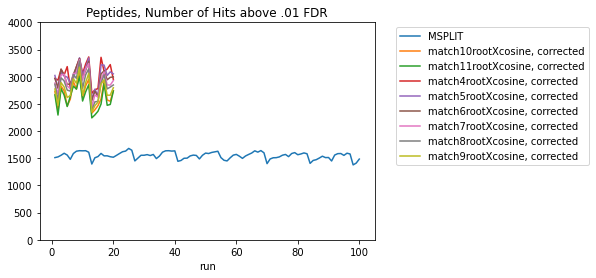

In [96]:
tempDf = scoreDf[scoreDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='num of hits')
graph.plot()
pyplot.title('Peptides, Number of Hits above .01 FDR')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,4000)

(0.0, 1.0)

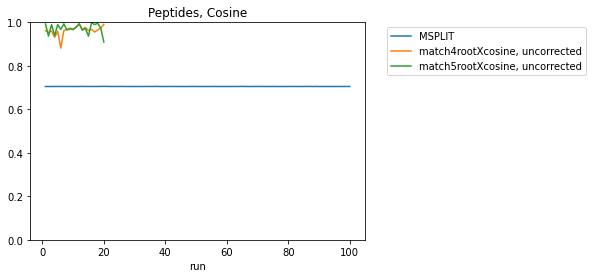

In [92]:
tempDf = scoreDf[scoreDf.type.isin(isin)]
graph = tempDf.pivot(index='run', columns='type', values='cosine')
graph.plot()
pyplot.title('Peptides, Cosine')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
axes = pyplot.gca()
pyplot.ylim(0,1)